In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv("C:/Users/konda/Downloads/housing[1].csv")

In [3]:
data.dropna(inplace=True)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [5]:
from sklearn.model_selection import train_test_split
X=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

In [7]:
train_data=X_train.join(Y_train)

In [8]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10975,-117.84,33.76,22.0,378.0,78.0,196.0,81.0,3.6806,<1H OCEAN,219400.0
1562,-121.94,37.76,4.0,6875.0,1439.0,2889.0,1307.0,4.6932,<1H OCEAN,356100.0
5810,-118.26,34.13,25.0,3208.0,1111.0,2843.0,1005.0,2.6673,<1H OCEAN,218100.0
1189,-121.52,39.43,15.0,2119.0,389.0,1079.0,374.0,2.3566,INLAND,80400.0
13350,-117.63,34.02,13.0,4864.0,729.0,2780.0,723.0,5.6168,INLAND,175400.0
...,...,...,...,...,...,...,...,...,...,...
5266,-118.55,34.04,41.0,1482.0,239.0,617.0,242.0,8.8619,<1H OCEAN,500001.0
18298,-122.12,37.40,32.0,3514.0,473.0,1583.0,480.0,10.3894,NEAR BAY,500001.0
19697,-121.63,39.10,22.0,3585.0,548.0,1757.0,577.0,4.1740,INLAND,100100.0
11632,-118.03,33.82,20.0,2662.0,464.0,1275.0,472.0,6.0162,<1H OCEAN,318500.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

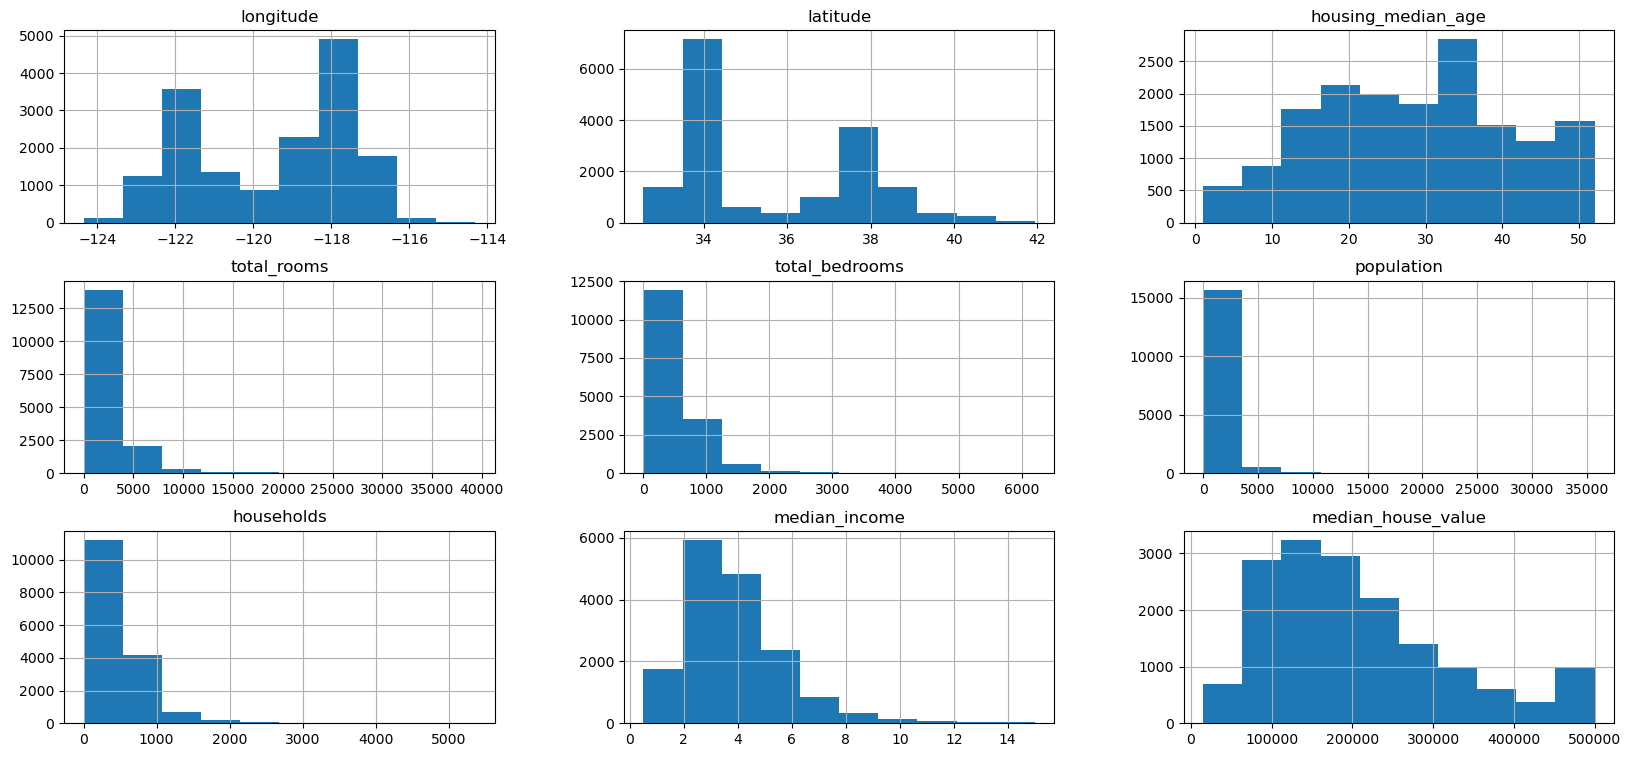

In [9]:
train_data.hist(figsize=(20,9))

In [10]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<AxesSubplot:>

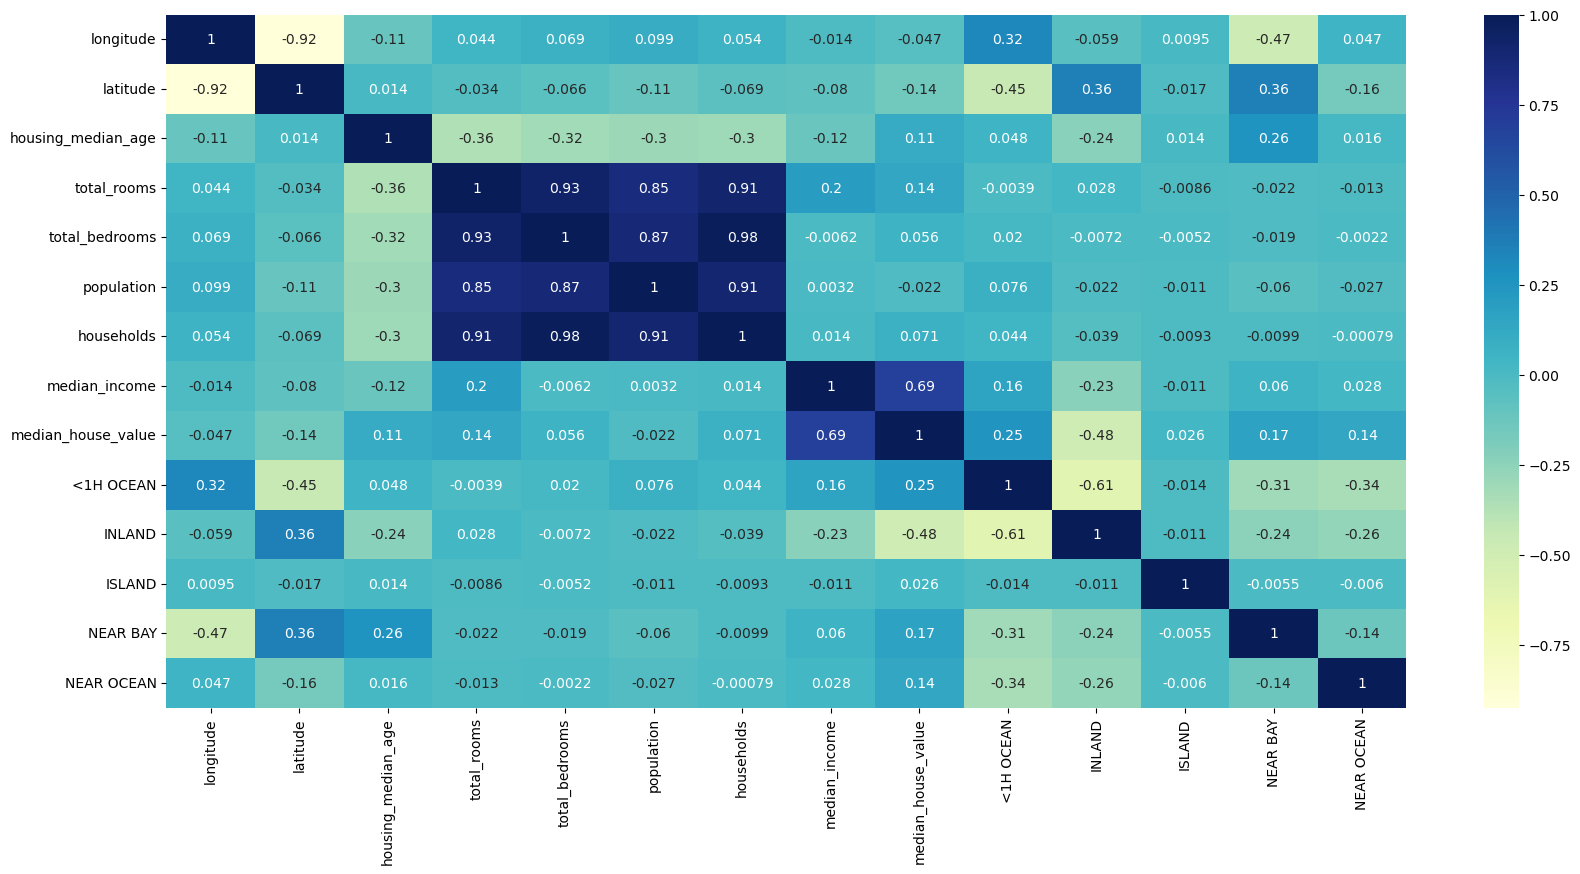

In [11]:
plt.figure(figsize=(20,9))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

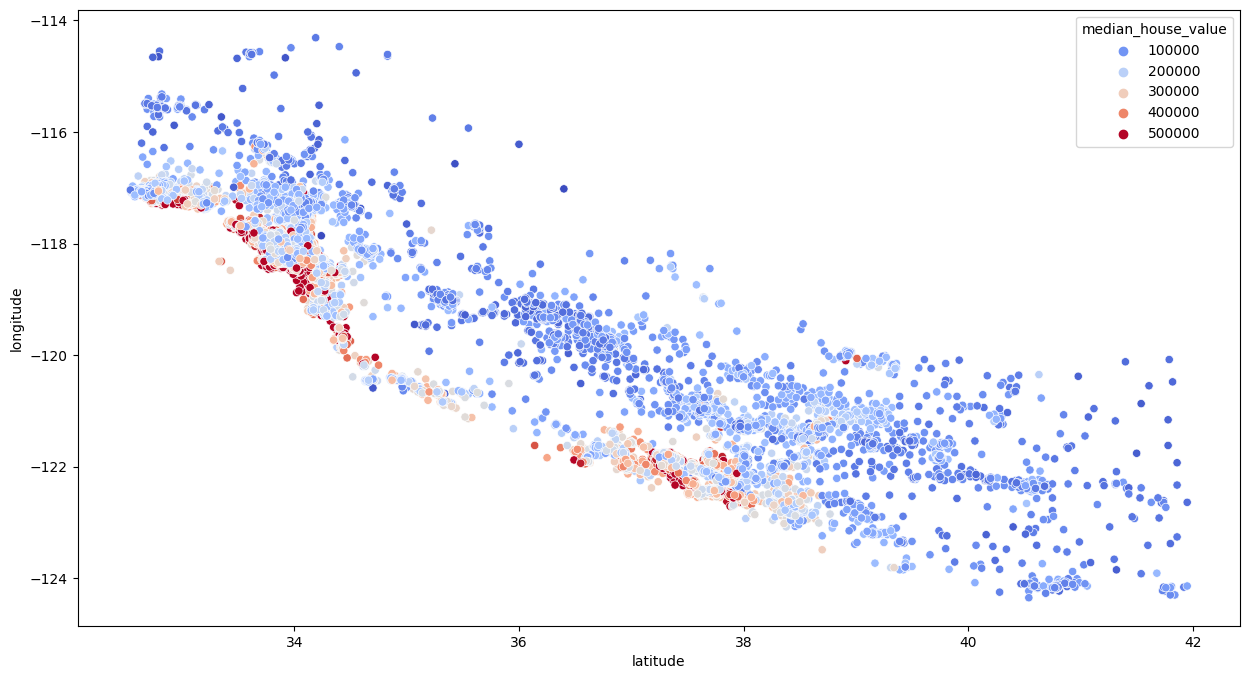

In [11]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue="median_house_value",palette="coolwarm")

In [12]:
X_train,Y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [13]:
test_data=X_test.join(Y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ratio']=test_data['total_bedrooms']/train_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/train_data['households']

X_test,Y_test=train_data.drop(["median_house_value"],axis=1),train_data["median_house_value"]

In [14]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
19595,-120.89,37.59,33.0,6.924612,5.332719,6.426488,5.347108,2.1510,195800.0,0,1,0,0,0,NaN,NaN
2805,-119.05,35.44,5.0,7.665753,6.190315,7.075809,6.084499,3.0268,77000.0,0,1,0,0,0,NaN,NaN
12418,-116.21,33.71,19.0,8.043984,6.669498,8.057694,6.650279,1.7083,82200.0,0,1,0,0,0,NaN,NaN
5422,-118.42,34.03,44.0,6.445720,4.882802,5.789960,5.056246,4.5278,374300.0,1,0,0,0,0,NaN,NaN
7686,-118.10,33.93,35.0,7.392032,5.713733,6.740519,5.652489,4.5769,186100.0,1,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8982,-118.43,34.00,37.0,7.201171,5.883322,6.916715,5.831882,3.7614,314300.0,1,0,0,0,0,NaN,NaN
9321,-122.53,37.97,44.0,8.187577,6.860664,7.513164,6.814543,2.6036,287500.0,0,0,0,1,0,NaN,NaN
2021,-119.81,36.70,52.0,5.752573,4.060443,5.187386,4.204693,1.2404,52500.0,0,1,0,0,0,NaN,NaN
3982,-118.63,34.19,32.0,8.180041,6.383507,7.462789,6.335054,5.1529,259600.0,1,0,0,0,0,NaN,NaN


In [15]:
reg.score(X_test,Y_test)

0.6447088222313591